# Import and set colors

In [1]:
import scanpy as sc
import anndata as ann
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm, colors
from gprofiler import gprofiler

import os 

In [2]:
plt.rcParams['figure.figsize']=(4,4) #rescale figures
sc.settings.verbosity = 3
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=300,transparent=False, fontsize=12, color_map='plasma')
sc.logging.print_header()

scanpy==1.7.1 anndata==0.7.5 umap==0.5.1 numpy==1.22.3 scipy==1.8.0 pandas==1.2.3 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3 pynndescent==0.5.4


In [3]:
#Define a nice colour map for gene expression
colors2 = plt.cm.plasma(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap2 = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [4]:
pair= [ "#DA0AD3", "#ED99BD",  "#FD3F14", "#ffbf00", 
       "#66B032", "#66B032", "#9AD255", "#9AD255",
       "#b30047",   "#dada2b", "#dada2b"]

# Set project file paths

In [5]:
file_path = '/Volumes/Seagate_Exp/Paper_sc_analysis/notebooks/analysis_early_time_points/040522_corrected_notebooks/Revision/'
#this is my file path please adapt it to your directory

In [6]:
data_dir =file_path +  'data/' 

In [7]:
table_dir = file_path + 'tables/230831diffxpy/'

In [8]:
sc.settings.figdir = file_path + 'figures/'

In [9]:
import datetime

today = datetime.date.today().strftime('%y%m%d') #creates a YYMMDD string of today's date

# Read Data & downstream analysis

In [10]:
adata_all_micro=sc.read(data_dir + "230808adata_treated_micro_proc_scVI.h5ad")

In [11]:
adata_all_micro

AnnData object with n_obs × n_vars = 10446 × 14633
    obs: 'sample_id', 'condition', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'n_counts', 'n_genes', 'doublet_score', 'doublet', 'size_factors', 'leiden', '_scvi_batch', '_scvi_labels', 'leiden_scVI', 'leiden13', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'leiden_all', 'S_score', 'G2M_score', 'phase', 'Cycling cells', 'cell_cycle', 'Microglia', 'DAM', 'Macrophages', 'BAM', 'Monocytes', 'DCs', 'NKT cells', 'T cells', 'B cells', 'Neutrophils', 'Neurons', 'OPCs', 'COPs', 'MOL', 'Astrocytes', 'Pericytes', 'VSMCs', 'VLMCs', 'VEC', 'annotated', 'annotated_group', 'leiden_micro_r1', 'leiden_micro_r0.5', 'leiden_micro_r0.4', 'leiden_micro_r0.3', 'clustersmicro'
    var: 'gene_i

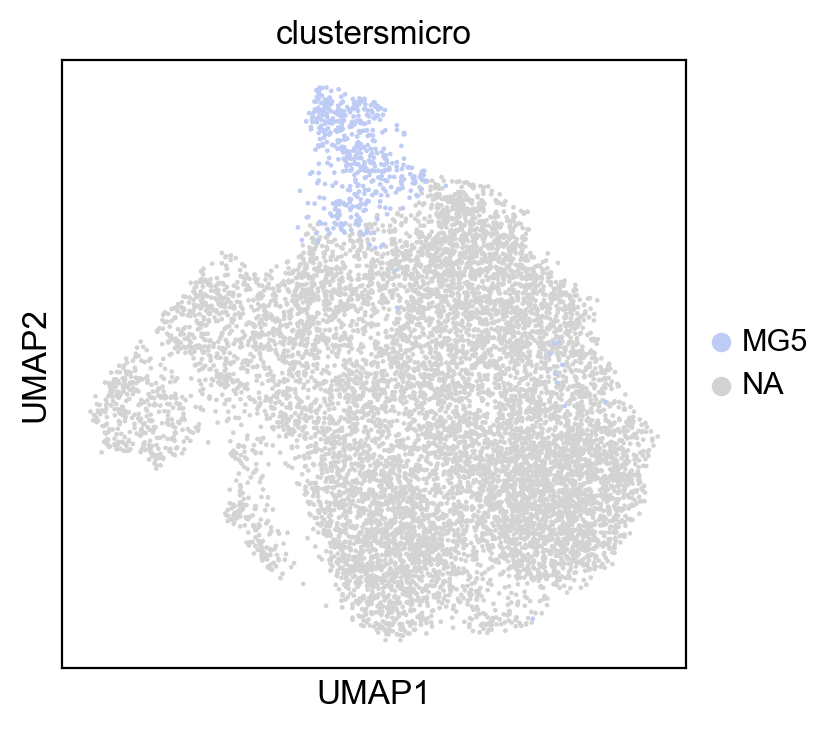

In [12]:
sc.pl.umap(adata_all_micro, color='clustersmicro', groups='MG5')

In [13]:
adata_all_micro_3dpi= adata_all_micro[np.in1d(adata_all_micro.obs['condition'], 
                           ['3dpi_CTRL','3dpi_INH'])].copy()

In [14]:
import batchglm.api as glm
import diffxpy.api as de

print("batchglm version "+glm.__version__)
print("diffpy version "+de.__version__)
from batchglm.pkg_constants import TF_CONFIG_PROTO

batchglm version v0.7.4
diffpy version v0.7.4


In [15]:
#Set number of threads
TF_CONFIG_PROTO.inter_op_parallelism_threads = 1
TF_CONFIG_PROTO.intra_op_parallelism_threads = 12

# 3dpi

In [16]:
adata_all_micro_3dpi.obs['clustersmicro'].value_counts()*0.1

MG4    60.9
MG2    19.7
MG6    16.6
MG1    16.4
MG3    11.0
MG5     4.1
MG7     1.8
MG8     1.0
Name: clustersmicro, dtype: float64

In [17]:
adata_all_micro_3dpi_MG1= adata_all_micro_3dpi[np.in1d(adata_all_micro_3dpi.obs['clustersmicro'], 
                           ['MG1'])].copy()

In [18]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_micro_3dpi_MG1.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_micro_3dpi_MG1, min_cells=16)
print('Number of genes after cell filter: {:d}'.format(adata_all_micro_3dpi_MG1.n_vars))

Total number of genes: 14633
filtered out 10264 genes that are detected in less than 16 cells
Number of genes after cell filter: 4369


In [19]:
adata_all_micro_3dpi_MG2= adata_all_micro_3dpi[np.in1d(adata_all_micro_3dpi.obs['clustersmicro'], 
                           ['MG2'])].copy()

In [20]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_micro_3dpi_MG2.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_micro_3dpi_MG2, min_cells=20)

print('Number of genes after cell filter: {:d}'.format(adata_all_micro_3dpi_MG2.n_vars))

Total number of genes: 14633
filtered out 9797 genes that are detected in less than 20 cells
Number of genes after cell filter: 4836


In [21]:
adata_all_micro_3dpi_MG3= adata_all_micro_3dpi[np.in1d(adata_all_micro_3dpi.obs['clustersmicro'], 
                           ['MG3'])].copy()

In [22]:
###### Filter genes:
print('Total number of genes: {:d}'.format(adata_all_micro_3dpi_MG3.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_micro_3dpi_MG3, min_cells=11)
print('Number of genes after cell filter: {:d}'.format(adata_all_micro_3dpi_MG3.n_vars))

Total number of genes: 14633
filtered out 10440 genes that are detected in less than 11 cells
Number of genes after cell filter: 4193


In [23]:
adata_all_micro_3dpi_MG4= adata_all_micro_3dpi[np.in1d(adata_all_micro_3dpi.obs['clustersmicro'], 
                           ['MG4'])].copy()

In [24]:
###### Filter genes:
print('Total number of genes: {:d}'.format(adata_all_micro_3dpi_MG4.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_micro_3dpi_MG4, min_cells=61)
print('Number of genes after cell filter: {:d}'.format(adata_all_micro_3dpi_MG4.n_vars))

Total number of genes: 14633
filtered out 7382 genes that are detected in less than 61 cells
Number of genes after cell filter: 7251


In [25]:
adata_all_micro_3dpi_MG6= adata_all_micro_3dpi[np.in1d(adata_all_micro_3dpi.obs['clustersmicro'], 
                           ['MG6'])].copy()

In [26]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_micro_3dpi_MG6.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_micro_3dpi_MG6, min_cells=17)
print('Number of genes after cell filter: {:d}'.format(adata_all_micro_3dpi_MG6.n_vars))

Total number of genes: 14633
filtered out 10932 genes that are detected in less than 17 cells
Number of genes after cell filter: 3701


# Cluster MG1

In [27]:
difxpy_reactivemicro_3dpi_INHvsCTRL_MG1= de.test.wald(
    data=adata_all_micro_3dpi_MG1.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_micro_3dpi_MG1.var_names,
    sample_description=adata_all_micro_3dpi_MG1.obs
)

training location model: False
training scale model: True
iter   0: ll=18306779.193938
iter   1: ll=18306779.193938, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=578298.903906, converged: 0.82% (loc: 0.82%, scale update: True), in 9.57sec
iter   3: ll=578298.903906, converged: 0.82% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=494026.851983, converged: 78.64% (loc: 78.64%, scale update: True), in 8.76sec
iter   5: ll=494026.851983, converged: 78.64% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=485940.936479, converged: 95.03% (loc: 95.03%, scale update: True), in 5.90sec
iter   7: ll=485940.936479, converged: 95.03% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=484605.779298, converged: 99.24% (loc: 99.24%, scale update: True), in 5.13sec
iter   9: ll=484605.779298, converged: 99.24% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=484573.920898, converged: 99.91% (loc: 99.91%, scale update: Tru

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [28]:
difxpy_reactivemicro_3dpi_INHvsCTRL_MG1.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
3576,Fyb,0.000031,0.133813,0.614031,1.286585,False,1.130390e-10,0.614031,0.147294,-236.483844
3886,Rnaset2b,0.000330,0.409594,-0.572537,1.585366,False,9.126761e-09,-0.572537,0.159457,-269.385563
4088,Cebpzos,0.000311,0.409594,-0.785122,0.682927,False,8.512396e-10,-0.785122,0.217730,-174.976698
2353,Uba52,0.000375,0.409594,0.570074,1.268293,False,5.237684e-09,0.570074,0.160265,-241.968124
2205,Hsp90b1,0.000614,0.536163,0.439243,3.189024,False,4.353477e-10,0.439243,0.128226,-359.215297
239,Pea15a,0.000875,0.637193,1.136691,0.256098,False,1.632393e-02,1.136691,0.341565,-13.922676
1862,Ftl1,0.009485,0.847295,0.291304,29.079268,False,2.283500e-08,0.291304,0.112296,-698.275259
2339,Clcn3,0.016425,0.847295,1.250019,0.115854,False,8.860911e-05,1.250019,0.520988,-57.302173
420,Chst1,0.018526,0.847295,1.250019,0.115854,False,3.368456e-10,1.250019,0.530810,-57.918249
1253,Ppm1g,0.005284,0.847295,-1.003375,0.268293,False,2.425527e-02,-1.003375,0.359738,-3.212305


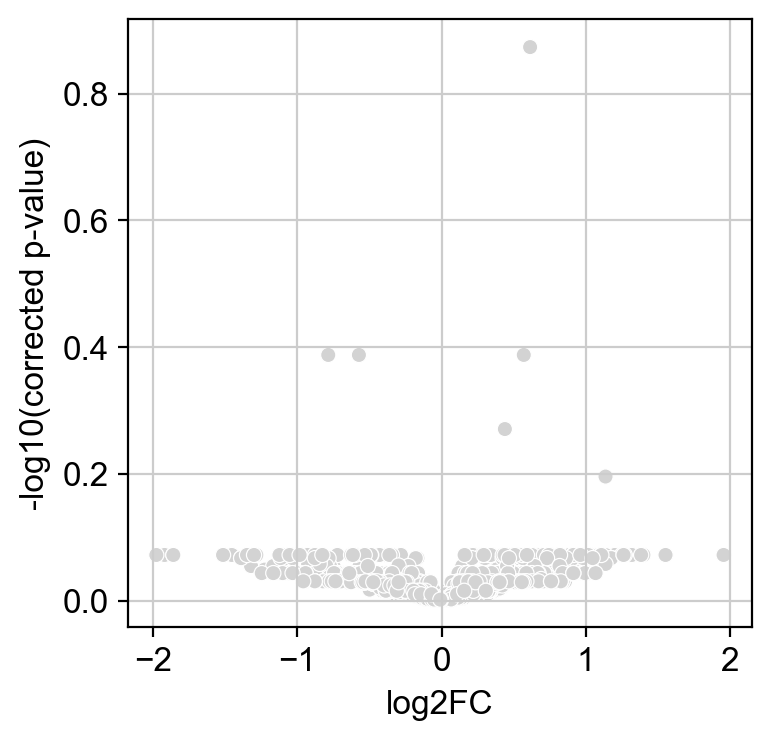

In [29]:
difxpy_reactivemicro_3dpi_INHvsCTRL_MG1.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [30]:
difxpy_reactivemicro_3dpi_INHvsCTRL_MG1.summary().to_csv(table_dir+today + 'difxpy_reactivemicro_3dpi_INHvsCTRL_MG1.csv')

In [31]:
difxpy_3dpi_INHvsCTRL_MG1 = pd.read_csv(table_dir + '230831difxpy_reactivemicro_3dpi_INHvsCTRL_MG1.csv', index_col=0)

In [32]:
table_dir + '230831difxpy_reactivemicro_3dpi_INHvsCTRL_MG1.csv'

'/Volumes/Seagate_Exp/Paper_sc_analysis/notebooks/analysis_early_time_points/040522_corrected_notebooks/Revision/tables/230831diffxpy/230831difxpy_reactivemicro_3dpi_INHvsCTRL_MG1.csv'

In [33]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_3dpi_INHvsCTRL_expressed_MG1=difxpy_3dpi_INHvsCTRL_MG1.loc[difxpy_3dpi_INHvsCTRL_MG1['mean']>0.2]

In [34]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_3dpi_INHvsCTRL_expressed_signif_MG1 = difxpy_3dpi_INHvsCTRL_expressed_MG1.loc[difxpy_3dpi_INHvsCTRL_expressed_MG1['pval']<0.05]

In [35]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
micro_3dpi_INH_MG1 = difxpy_3dpi_INHvsCTRL_expressed_signif_MG1.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_MG1['log2fc']>0.7]
micro_3dpi_CTRL_MG1 = difxpy_3dpi_INHvsCTRL_expressed_signif_MG1.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_MG1['log2fc']<-0.7]

In [36]:
micro_3dpi_INH_MG1.shape

(29, 10)

In [37]:
micro_3dpi_CTRL_MG1.shape

(22, 10)

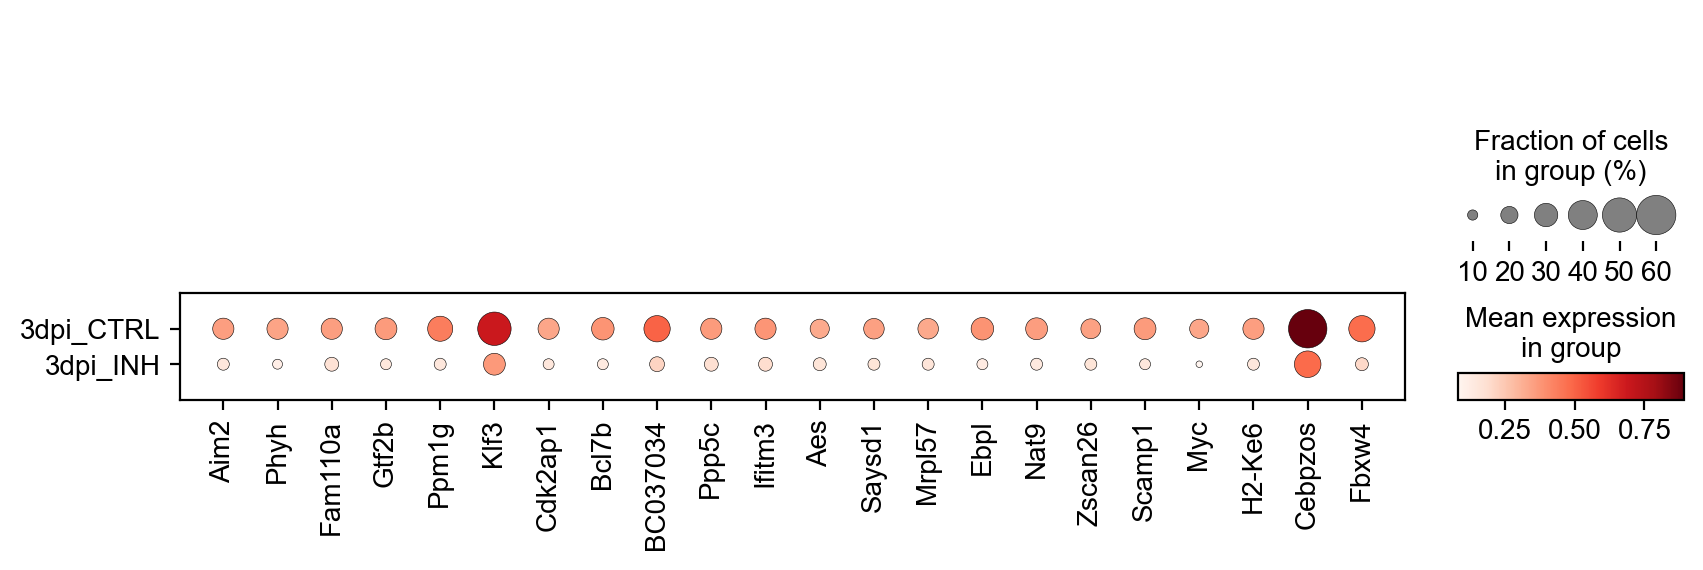

In [38]:
sc.pl.dotplot(adata_all_micro_3dpi_MG1,micro_3dpi_CTRL_MG1['gene'].head(30) , groupby='condition',)

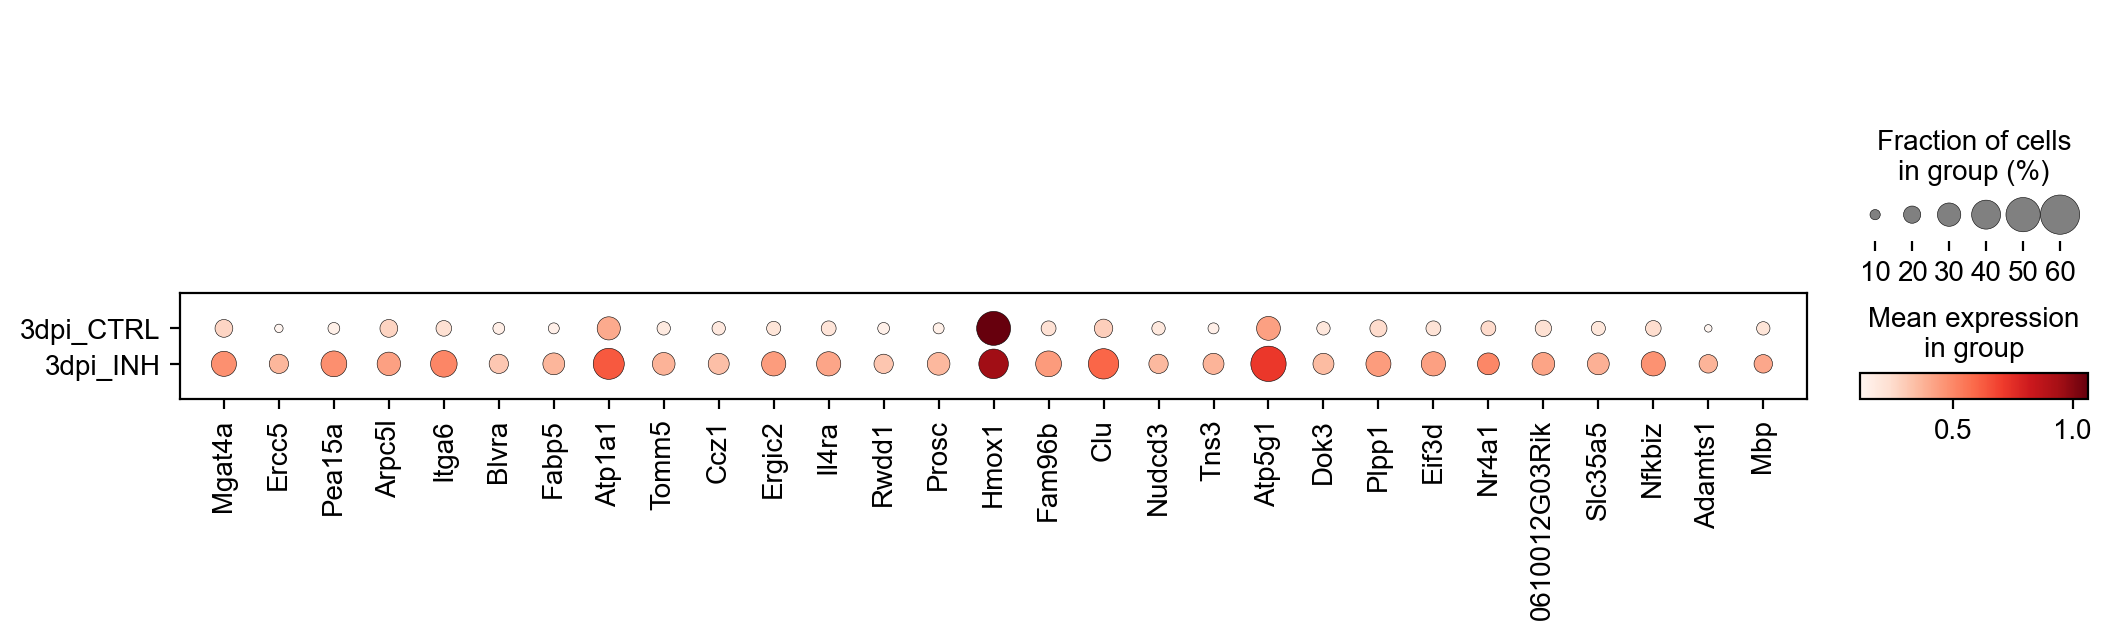

In [39]:
sc.pl.dotplot(adata_all_micro_3dpi_MG1,micro_3dpi_INH_MG1['gene'].head(30) , groupby='condition',)

# Cluster MG2

In [40]:
difxpy_reactivemicro_3dpi_INHvsCTRL_MG2= de.test.wald(
    data=adata_all_micro_3dpi_MG2.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_micro_3dpi_MG2.var_names,
    sample_description=adata_all_micro_3dpi_MG2.obs
)

training location model: False
training scale model: True
iter   0: ll=20700232.608804
iter   1: ll=20700232.608804, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=808453.481650, converged: 0.33% (loc: 0.33%, scale update: True), in 9.86sec
iter   3: ll=808453.481650, converged: 0.33% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=732953.786275, converged: 82.28% (loc: 82.28%, scale update: True), in 9.25sec
iter   5: ll=732953.786275, converged: 82.28% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=723310.006002, converged: 95.43% (loc: 95.43%, scale update: True), in 6.00sec
iter   7: ll=723310.006002, converged: 95.43% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=721456.236449, converged: 99.03% (loc: 99.03%, scale update: True), in 5.51sec
iter   9: ll=721456.236449, converged: 99.03% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=720793.876055, converged: 99.79% (loc: 99.79%, scale update: Tru

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [41]:
difxpy_reactivemicro_3dpi_INHvsCTRL_MG2.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
2593,Uba52,0.000008,0.040018,0.531546,3.060914,False,2.620292e-09,0.531546,0.119236,-418.522544
3359,Med31,0.000927,0.747100,-1.222969,0.167513,False,2.946770e-07,-1.222969,0.369274,-88.112801
1940,Fosb,0.000521,0.747100,0.856472,0.888325,False,7.230457e-10,0.856472,0.246831,-250.363197
4660,Adrbk1,0.000919,0.747100,-0.770984,0.380711,False,4.460392e-01,-0.770984,0.232621,-59.951393
3329,Cd68,0.000698,0.747100,-0.308970,4.984772,False,4.147154e-09,-0.308970,0.091134,-486.816644
3742,Scamp1,0.000547,0.747100,-1.377120,0.152284,False,1.102268e-02,-1.377120,0.398410,0.000000
3275,Gm2a,0.001153,0.796241,0.601580,0.832487,False,3.077040e-10,0.601580,0.185080,-234.635709
4290,Rnaset2a,0.001675,0.833117,-0.417203,1.624365,False,1.825968e-09,-0.417203,0.132763,-327.159687
2743,Trappc2l,0.001979,0.833117,0.828301,0.446701,False,3.382287e-10,0.828301,0.267766,-168.224638
836,Tsc22d2,0.002212,0.833117,1.341980,0.228426,False,1.032356e-01,1.341980,0.438529,-4.932042


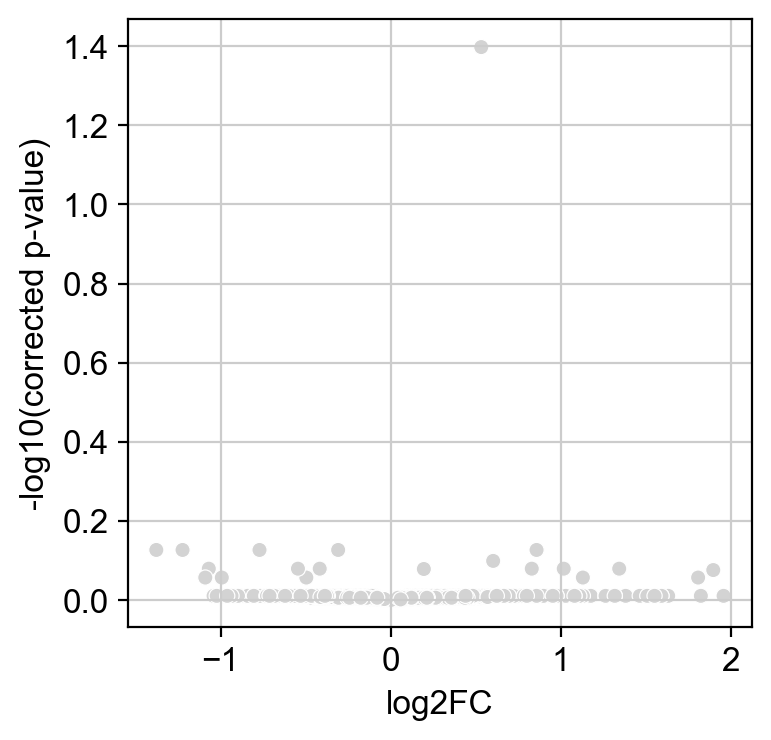

In [42]:
difxpy_reactivemicro_3dpi_INHvsCTRL_MG2.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [43]:
difxpy_reactivemicro_3dpi_INHvsCTRL_MG2.summary().to_csv(table_dir+today + 'difxpy_reactivemicro_3dpi_INHvsCTRL_MG2.csv')

In [44]:
difxpy_3dpi_INHvsCTRL_MG2 = pd.read_csv(table_dir + '230831difxpy_reactivemicro_3dpi_INHvsCTRL_MG2.csv', index_col=0)

In [45]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_3dpi_INHvsCTRL_expressed_MG2=difxpy_3dpi_INHvsCTRL_MG2.loc[difxpy_3dpi_INHvsCTRL_MG2['mean']>0.2]

In [46]:
difxpy_3dpi_INHvsCTRL_expressed_MG2

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
2,Tcea1,0.209107,0.975812,0.337678,0.360406,False,1.124244e-10,0.337678,0.268847,-152.528163
3,Atp6v1h,0.106073,0.975812,0.540619,0.238579,False,4.636209e-09,0.540619,0.334522,-115.711894
5,Pcmtd1,0.133391,0.975812,-0.380290,0.340102,False,9.146850e-11,-0.380290,0.253381,-147.012491
8,Sgk3,0.983376,0.998589,-0.006574,0.218274,False,2.934367e-01,-0.006574,0.315495,0.000000
9,Snhg6,0.476491,0.986645,-0.229718,0.238579,False,1.626017e-09,-0.229718,0.322656,-119.275567
...,...,...,...,...,...,...,...,...,...,...
4830,mt-Nd4,0.774642,0.994219,-0.037865,8.588832,False,2.370390e-10,-0.037865,0.132253,-626.785422
4831,mt-Nd5,0.555083,0.986645,0.121478,0.903553,False,1.605660e-09,0.121478,0.205839,-258.955999
4832,mt-Cytb,0.716148,0.986645,0.042793,15.060914,False,4.894605e-08,0.042793,0.117689,-725.103381
4834,PISD,0.678744,0.986645,-0.079905,0.573604,False,2.806273e-01,-0.079905,0.192925,0.000000


In [47]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_3dpi_INHvsCTRL_expressed_signif_MG2 = difxpy_3dpi_INHvsCTRL_expressed_MG2.loc[difxpy_3dpi_INHvsCTRL_expressed_MG2['pval']<0.05]

In [48]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
micro_3dpi_INH_MG2 = difxpy_3dpi_INHvsCTRL_expressed_signif_MG2.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_MG2['log2fc']>0.7]
micro_3dpi_CTRL_MG2 = difxpy_3dpi_INHvsCTRL_expressed_signif_MG2.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_MG2['log2fc']<-0.7]

In [49]:
micro_3dpi_INH_MG2.shape

(38, 10)

In [50]:
micro_3dpi_CTRL_MG2.shape

(6, 10)

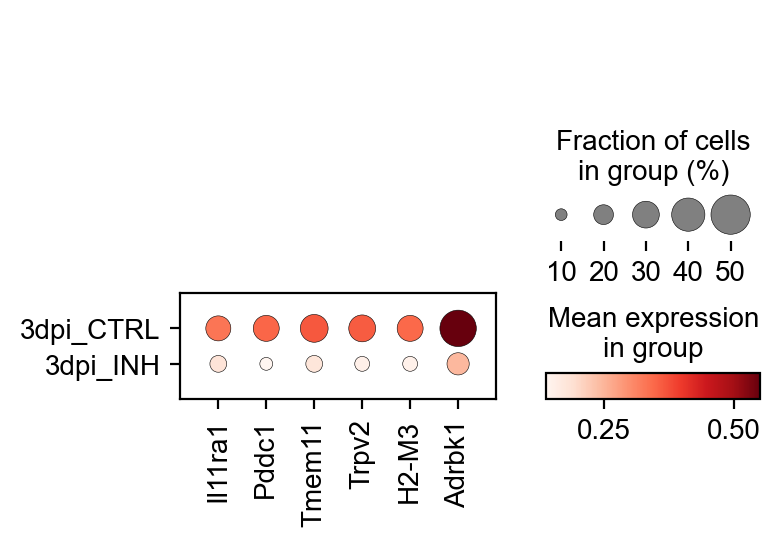

In [51]:
sc.pl.dotplot(adata_all_micro_3dpi_MG2,micro_3dpi_CTRL_MG2['gene'].head(30) , groupby='condition',)

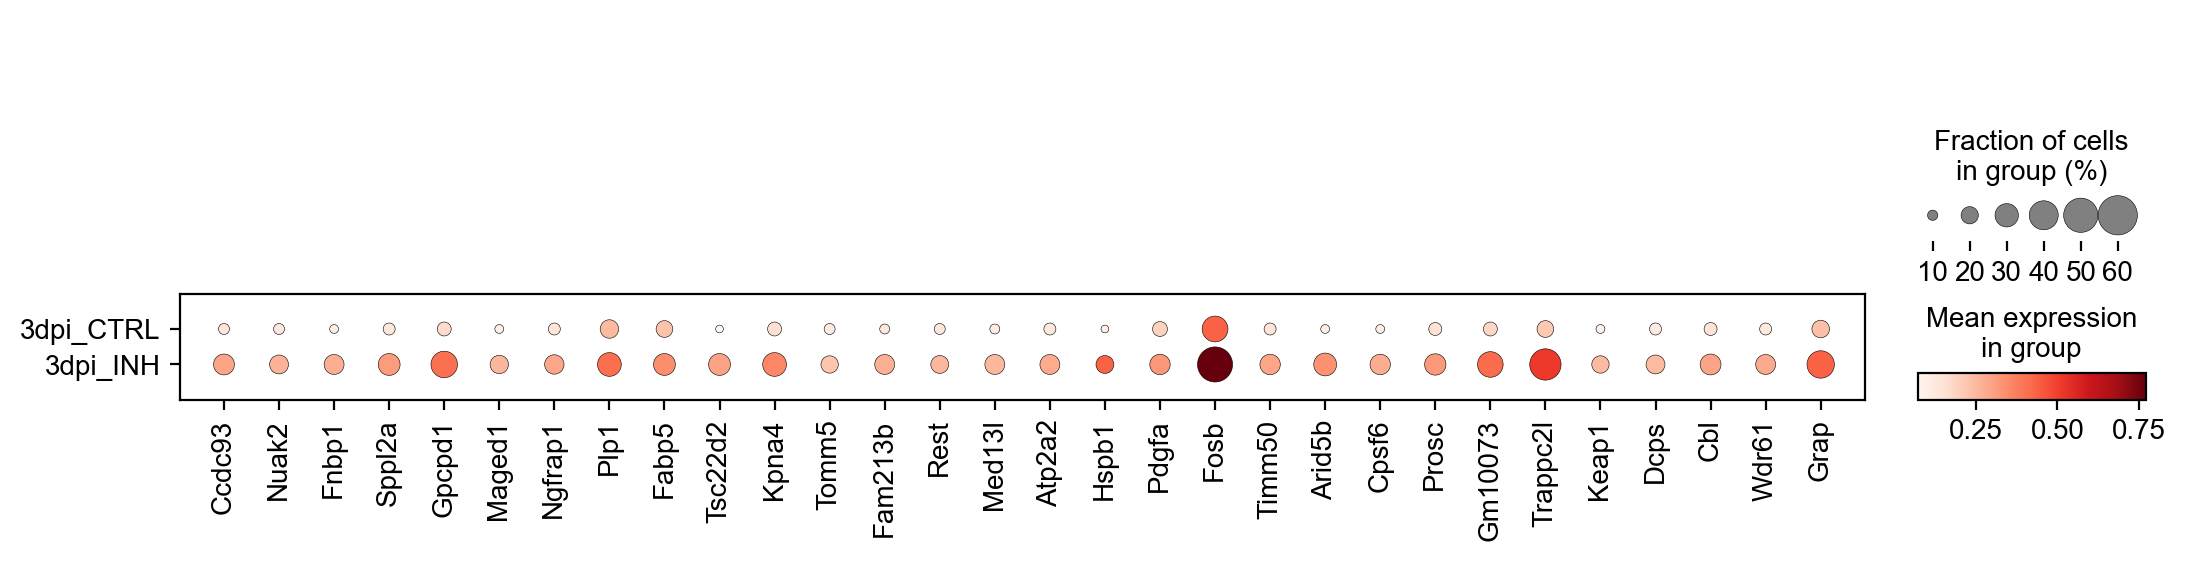

In [52]:
sc.pl.dotplot(adata_all_micro_3dpi_MG2,micro_3dpi_INH_MG2['gene'].head(30) , groupby='condition',)

# Cluster MG3

In [53]:
difxpy_reactivemicro_3dpi_INHvsCTRL_MG3= de.test.wald(
    data=adata_all_micro_3dpi_MG3.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_micro_3dpi_MG3.var_names,
    sample_description=adata_all_micro_3dpi_MG3.obs
)

training location model: False
training scale model: True
iter   0: ll=13128182.138769
iter   1: ll=13128182.138769, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=370309.881154, converged: 0.17% (loc: 0.17%, scale update: True), in 8.81sec
iter   3: ll=370309.881154, converged: 0.17% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=313749.218455, converged: 77.56% (loc: 77.56%, scale update: True), in 8.34sec
iter   5: ll=313749.218455, converged: 77.56% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=307296.900464, converged: 94.28% (loc: 94.28%, scale update: True), in 5.72sec
iter   7: ll=307296.900464, converged: 94.28% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=306217.938829, converged: 98.97% (loc: 98.97%, scale update: True), in 5.09sec
iter   9: ll=306217.938829, converged: 98.97% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=305936.051404, converged: 99.74% (loc: 99.74%, scale update: Tru

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [54]:
difxpy_reactivemicro_3dpi_INHvsCTRL_MG3.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
1973,Irf7,0.000000e+00,0.000000,-297.776029,0.200000,False,7.668189e-09,-297.776029,2.222759e-162,-42.114303
3840,H2-D1,3.554449e-07,0.000745,-0.779224,4.700000,False,3.419734e-08,-0.779224,1.530474e-01,-274.383068
441,B2m,5.846707e-07,0.000817,-0.529539,18.872727,False,2.389663e-09,-0.529539,1.059881e-01,-399.970378
3468,Ly6e,6.037726e-06,0.006329,-0.571417,6.445455,False,2.236867e-08,-0.571417,1.262783e-01,-297.972306
1095,Cd52,1.289124e-05,0.010811,-0.933117,2.027273,False,8.293959e-10,-0.933117,2.139223e-01,-202.290163
740,P2ry12,1.558283e-05,0.010890,-0.379323,13.272727,False,4.085387e-08,-0.379323,8.780048e-02,-347.230583
1463,Ndufa5,6.287335e-05,0.037661,-1.613277,0.400000,False,2.183118e-10,-1.613277,4.031419e-01,-82.861069
3636,Rtp4,1.002731e-04,0.038222,-3.079614,0.372727,False,1.761144e-09,-3.079614,7.916887e-01,-68.620457
1525,Vamp8,8.588850e-05,0.038222,-0.739168,1.281818,False,4.707801e-09,-0.739168,1.882105e-01,-159.299986
2381,Cyba,9.823186e-05,0.038222,-0.356876,6.345455,False,7.507170e-09,-0.356876,9.162606e-02,-272.819374


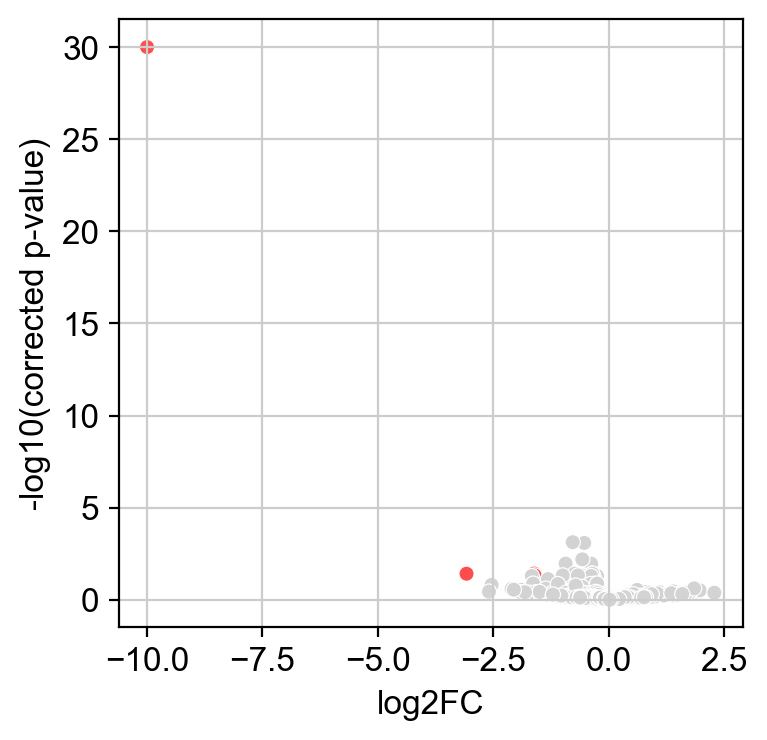

In [55]:
difxpy_reactivemicro_3dpi_INHvsCTRL_MG3.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [56]:
difxpy_reactivemicro_3dpi_INHvsCTRL_MG3.summary().to_csv(table_dir+today + 'difxpy_reactivemicro_3dpi_INHvsCTRL_MG3.csv')

In [57]:
difxpy_3dpi_INHvsCTRL_MG3 = pd.read_csv(table_dir + '230831difxpy_reactivemicro_3dpi_INHvsCTRL_MG3.csv', index_col=0)

In [58]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_3dpi_INHvsCTRL_expressed_MG3=difxpy_3dpi_INHvsCTRL_MG3.loc[difxpy_3dpi_INHvsCTRL_MG3['mean']>0.2]

In [59]:
difxpy_3dpi_INHvsCTRL_expressed_MG3

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
1,Tcea1,0.397957,0.842499,0.360804,0.236364,False,1.288639e-09,0.360804,0.426848,-65.881328
6,Snhg6,0.044138,0.482610,-0.862971,0.227273,False,3.066074e-01,-0.862971,0.428746,-19.998365
9,Tram1,0.148657,0.687989,-0.291521,0.900000,False,8.551944e-01,-0.291521,0.201843,-94.152658
11,Rpl7,0.468414,0.869349,-0.101325,4.618182,False,4.739810e-10,-0.101325,0.139747,-275.647731
13,Tceb1,0.044914,0.482610,-0.696986,0.381818,False,2.988040e-09,-0.696986,0.347544,-87.428538
...,...,...,...,...,...,...,...,...,...,...
4187,mt-Nd4l,0.583063,0.905470,0.227273,0.218182,False,2.767661e-01,0.227273,0.414039,-37.663658
4188,mt-Nd4,0.969105,0.990362,-0.007200,5.709091,False,6.084210e-10,-0.007200,0.185899,-309.670152
4189,mt-Nd5,0.851157,0.951178,0.064072,0.736364,False,1.490428e-10,0.064072,0.341461,-128.857184
4190,mt-Cytb,0.615599,0.905470,-0.086005,10.190909,False,5.389884e-09,-0.086005,0.171291,-368.047196


In [60]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_3dpi_INHvsCTRL_expressed_signif_MG3 = difxpy_3dpi_INHvsCTRL_expressed_MG3.loc[difxpy_3dpi_INHvsCTRL_expressed_MG3['pval']<0.05]

In [61]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
micro_3dpi_INH_MG3 = difxpy_3dpi_INHvsCTRL_expressed_signif_MG3.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_MG3['log2fc']>0.7]
micro_3dpi_CTRL_MG3 = difxpy_3dpi_INHvsCTRL_expressed_signif_MG3.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_MG3['log2fc']<-0.7]

In [62]:
micro_3dpi_INH_MG3.shape

(11, 10)

In [63]:
micro_3dpi_CTRL_MG3.shape

(109, 10)

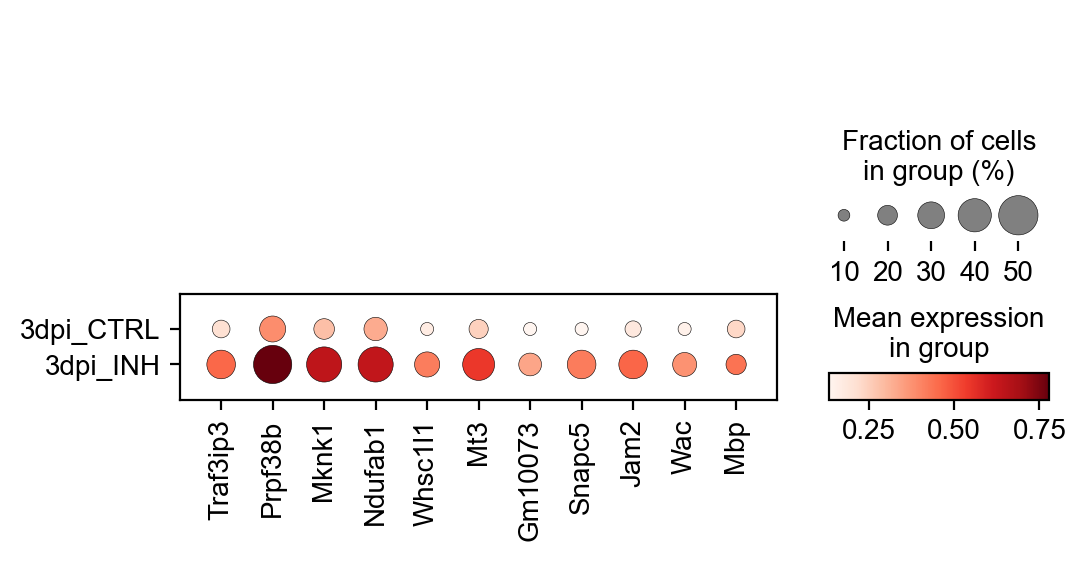

In [64]:
sc.pl.dotplot(adata_all_micro_3dpi_MG3,micro_3dpi_INH_MG3['gene'].head(30) , groupby='condition',)

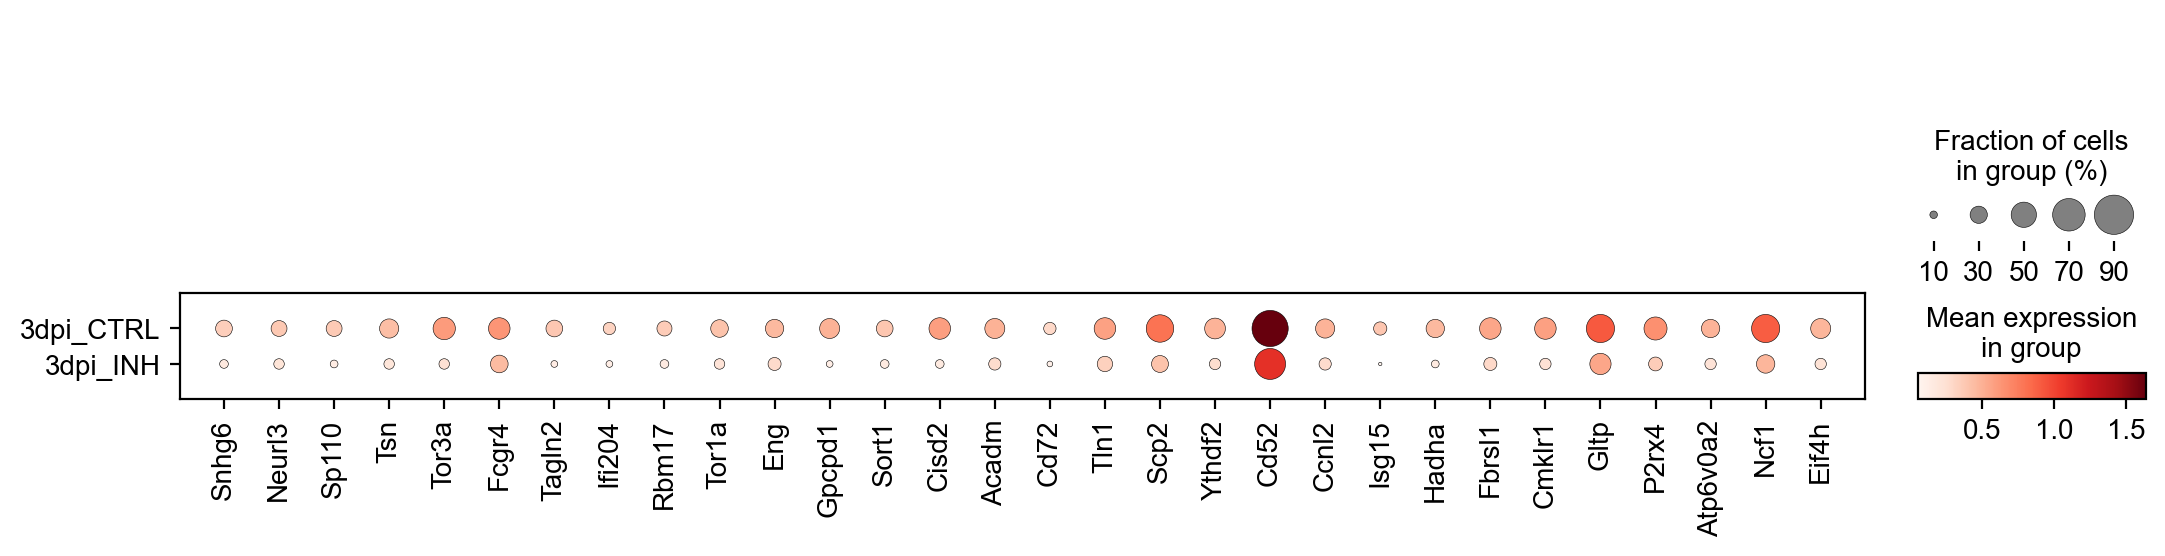

In [65]:
sc.pl.dotplot(adata_all_micro_3dpi_MG3,micro_3dpi_CTRL_MG3['gene'].head(30) , groupby='condition',)

# Cluster MG4

In [66]:
difxpy_reactivemicro_3dpi_INHvsCTRL_MG4= de.test.wald(
    data=adata_all_micro_3dpi_MG4.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_micro_3dpi_MG4.var_names,
    sample_description=adata_all_micro_3dpi_MG4.obs
)

training location model: False
training scale model: True
iter   0: ll=11341034.586826
iter   1: ll=11341034.586826, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=4796382.451973, converged: 0.22% (loc: 0.22%, scale update: True), in 12.81sec
iter   3: ll=4796382.451973, converged: 0.22% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=4750773.244352, converged: 97.39% (loc: 97.39%, scale update: True), in 12.90sec
iter   5: ll=4750773.244352, converged: 97.39% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=4746747.793784, converged: 99.46% (loc: 99.46%, scale update: True), in 5.76sec
iter   7: ll=4746747.793784, converged: 99.46% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=4746238.266071, converged: 99.85% (loc: 99.85%, scale update: True), in 5.45sec
iter   9: ll=4746238.266071, converged: 99.85% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=4746238.266071, converged: 100.00% (loc: 100.00%, scal

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [67]:
difxpy_reactivemicro_3dpi_INHvsCTRL_MG3.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
1973,Irf7,0.000000e+00,0.000000,-297.776029,0.200000,False,7.668189e-09,-297.776029,2.222759e-162,-42.114303
3840,H2-D1,3.554449e-07,0.000745,-0.779224,4.700000,False,3.419734e-08,-0.779224,1.530474e-01,-274.383068
441,B2m,5.846707e-07,0.000817,-0.529539,18.872727,False,2.389663e-09,-0.529539,1.059881e-01,-399.970378
3468,Ly6e,6.037726e-06,0.006329,-0.571417,6.445455,False,2.236867e-08,-0.571417,1.262783e-01,-297.972306
1095,Cd52,1.289124e-05,0.010811,-0.933117,2.027273,False,8.293959e-10,-0.933117,2.139223e-01,-202.290163
740,P2ry12,1.558283e-05,0.010890,-0.379323,13.272727,False,4.085387e-08,-0.379323,8.780048e-02,-347.230583
1463,Ndufa5,6.287335e-05,0.037661,-1.613277,0.400000,False,2.183118e-10,-1.613277,4.031419e-01,-82.861069
3636,Rtp4,1.002731e-04,0.038222,-3.079614,0.372727,False,1.761144e-09,-3.079614,7.916887e-01,-68.620457
1525,Vamp8,8.588850e-05,0.038222,-0.739168,1.281818,False,4.707801e-09,-0.739168,1.882105e-01,-159.299986
2381,Cyba,9.823186e-05,0.038222,-0.356876,6.345455,False,7.507170e-09,-0.356876,9.162606e-02,-272.819374


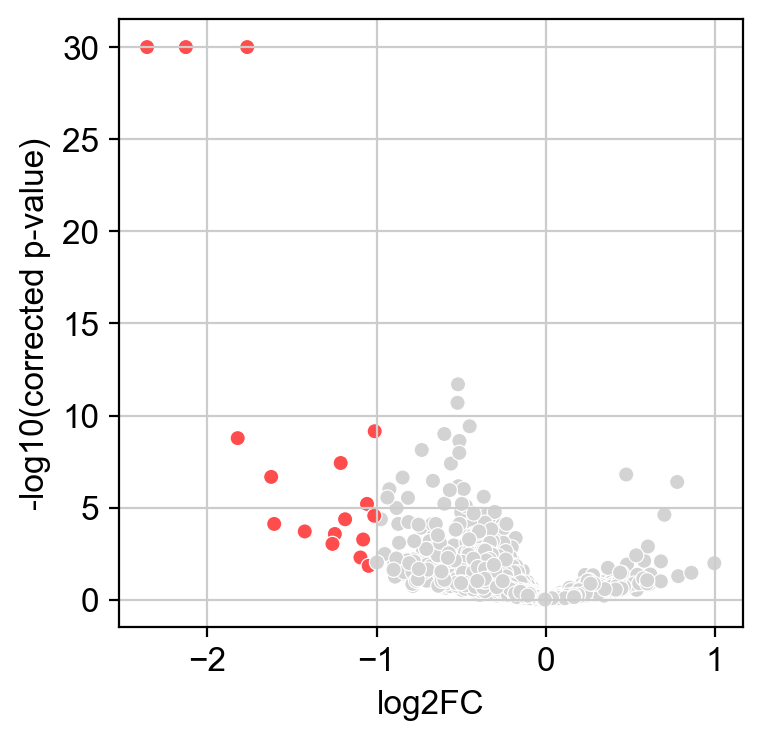

In [68]:
difxpy_reactivemicro_3dpi_INHvsCTRL_MG4.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [69]:
difxpy_reactivemicro_3dpi_INHvsCTRL_MG4.summary().to_csv(table_dir+today + 'difxpy_reactivemicro_3dpi_INHvsCTRL_MG4.csv')

In [70]:
today

'230831'

In [71]:
difxpy_3dpi_INHvsCTRL_MG4 = pd.read_csv(table_dir + '230831difxpy_reactivemicro_3dpi_INHvsCTRL_MG4.csv', index_col=0)

In [72]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_3dpi_INHvsCTRL_expressed_MG4=difxpy_3dpi_INHvsCTRL_MG4.loc[difxpy_3dpi_INHvsCTRL_MG4['mean']>0.2]

In [73]:
difxpy_3dpi_INHvsCTRL_expressed_MG4

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,Mrpl15,0.002936,0.039430,-0.349385,0.776683,False,5.595162e-10,-0.349385,0.117467,-736.494205
1,Lypla1,0.974484,0.986006,-0.004692,0.408867,False,9.123220e-11,-0.004692,0.146680,-516.547450
2,Tcea1,0.344306,0.583173,-0.110034,0.627258,False,3.451538e-10,-0.110034,0.116353,-655.368897
3,Atp6v1h,0.903492,0.952652,0.014360,0.612479,False,4.189549e-09,0.014360,0.118431,-647.420559
4,Rb1cc1,0.182955,0.404084,-0.216486,0.262726,False,1.631896e-10,-0.216486,0.162562,-389.347610
...,...,...,...,...,...,...,...,...,...,...
7246,mt-Nd5,0.240147,0.470996,-0.097614,2.847291,False,8.954012e-09,-0.097614,0.083103,-1334.041235
7247,mt-Cytb,0.932434,0.966636,-0.005636,38.530378,False,2.517876e-08,-0.005636,0.066475,-2812.119522
7248,Vamp7,0.222875,0.450950,-0.180671,0.334975,False,9.878301e-11,-0.180671,0.148223,-454.465715
7249,PISD,0.154187,0.367202,-0.149647,0.801314,False,5.203544e-09,-0.149647,0.105023,-744.507584


In [74]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_3dpi_INHvsCTRL_expressed_signif_MG4 = difxpy_3dpi_INHvsCTRL_expressed_MG4.loc[difxpy_3dpi_INHvsCTRL_expressed_MG4['pval']<0.05]

In [75]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
micro_3dpi_INH_MG4 = difxpy_3dpi_INHvsCTRL_expressed_signif_MG4.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_MG4['log2fc']>0.7]
micro_3dpi_CTRL_MG4 = difxpy_3dpi_INHvsCTRL_expressed_signif_MG4.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_MG4['log2fc']<-0.7]

In [76]:
micro_3dpi_INH_MG4.shape

(2, 10)

In [77]:
micro_3dpi_CTRL_MG4.shape

(61, 10)

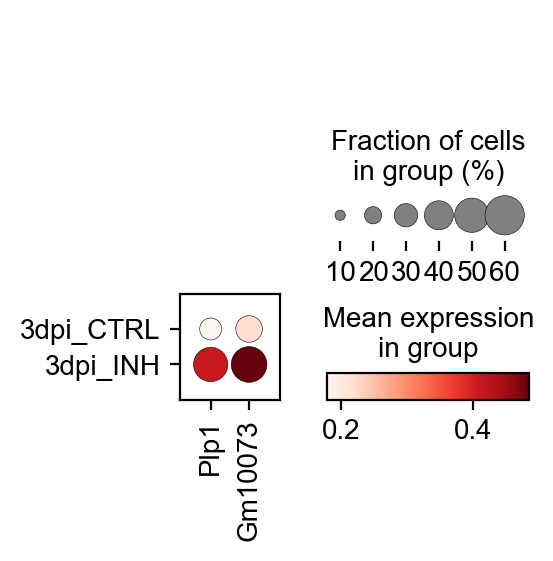

In [78]:
sc.pl.dotplot(adata_all_micro_3dpi_MG4,micro_3dpi_INH_MG4['gene'].head(30) , groupby='condition',)

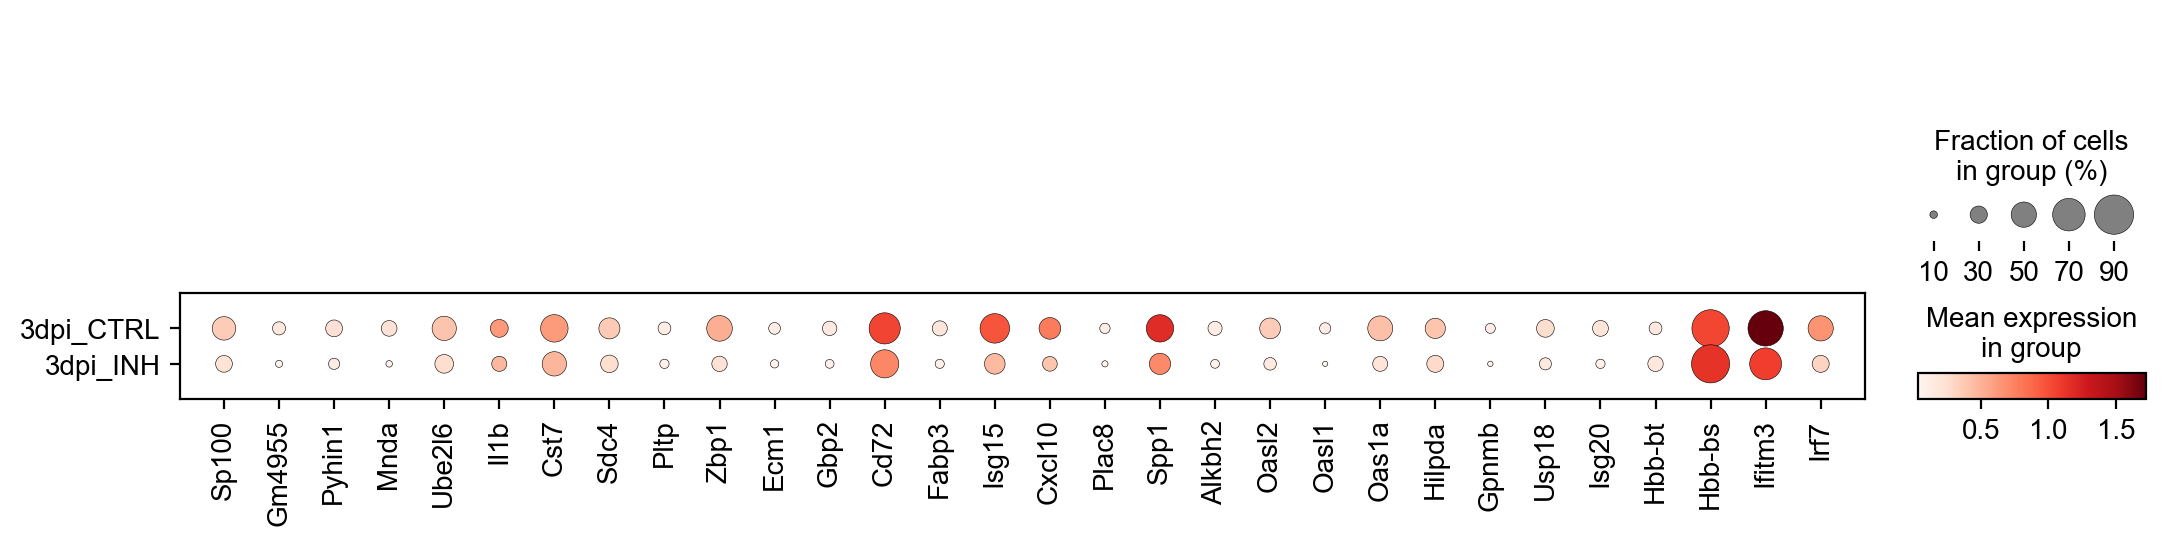

In [79]:
sc.pl.dotplot(adata_all_micro_3dpi_MG4,micro_3dpi_CTRL_MG4['gene'].head(30) , groupby='condition',)

# Cluster MG6

In [80]:
difxpy_reactivemicro_3dpi_INHvsCTRL_MG6= de.test.wald(
    data=adata_all_micro_3dpi_MG6.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_micro_3dpi_MG6.var_names,
    sample_description=adata_all_micro_3dpi_MG6.obs
)

training location model: False
training scale model: True
iter   0: ll=4607202.979313
iter   1: ll=4607202.979313, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=593396.319905, converged: 0.14% (loc: 0.14%, scale update: True), in 7.96sec
iter   3: ll=593396.319905, converged: 0.14% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=574785.083744, converged: 92.49% (loc: 92.49%, scale update: True), in 7.75sec
iter   5: ll=574785.083744, converged: 92.49% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=573052.042755, converged: 98.65% (loc: 98.65%, scale update: True), in 5.14sec
iter   7: ll=573052.042755, converged: 98.65% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=572790.891342, converged: 99.76% (loc: 99.76%, scale update: True), in 4.89sec
iter   9: ll=572790.891342, converged: 99.76% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=572789.705219, converged: 99.97% (loc: 99.97%, scale update: True)

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [81]:
difxpy_reactivemicro_3dpi_INHvsCTRL_MG6.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
1637,Hbb-bs,2.824407e-13,1.045313e-09,-2.155266,5.054217,False,1.189801e-07,-2.155266,0.295140,-334.223349
2472,Hba-a1,1.485523e-11,2.748960e-08,-3.092466,4.451807,False,4.569972e-09,-3.092466,0.458190,-211.867164
2007,Bst2,9.384049e-11,1.157679e-07,-1.095785,4.861446,False,1.765226e-10,-1.095785,0.169193,-424.730115
1722,Ifitm3,6.615084e-10,6.120607e-07,-1.352143,7.066265,False,1.550886e-08,-1.352143,0.218969,-461.047336
2473,Hba-a2,1.172240e-07,8.676917e-05,-3.200242,2.740964,False,6.009144e-09,-3.200242,0.604073,-146.007105
3050,Ly6e,2.155271e-07,1.329443e-04,-0.721838,8.813253,False,4.163079e-10,-0.721838,0.139205,-522.159224
2209,Phf11b,6.612404e-07,3.496072e-04,-1.225510,1.283133,False,1.178443e-08,-1.225510,0.246462,-242.444895
3274,Rnaset2a,1.882890e-06,7.742861e-04,-0.752532,1.753012,False,6.686655e-09,-0.752532,0.157909,-285.386805
3051,Ly6a,1.745745e-06,7.742861e-04,-1.873167,0.530120,False,3.543463e-09,-1.873167,0.391808,-140.099839
1159,Oas1a,3.478658e-06,1.287451e-03,-1.398289,0.469880,False,1.651939e-09,-1.398289,0.301334,-141.406844


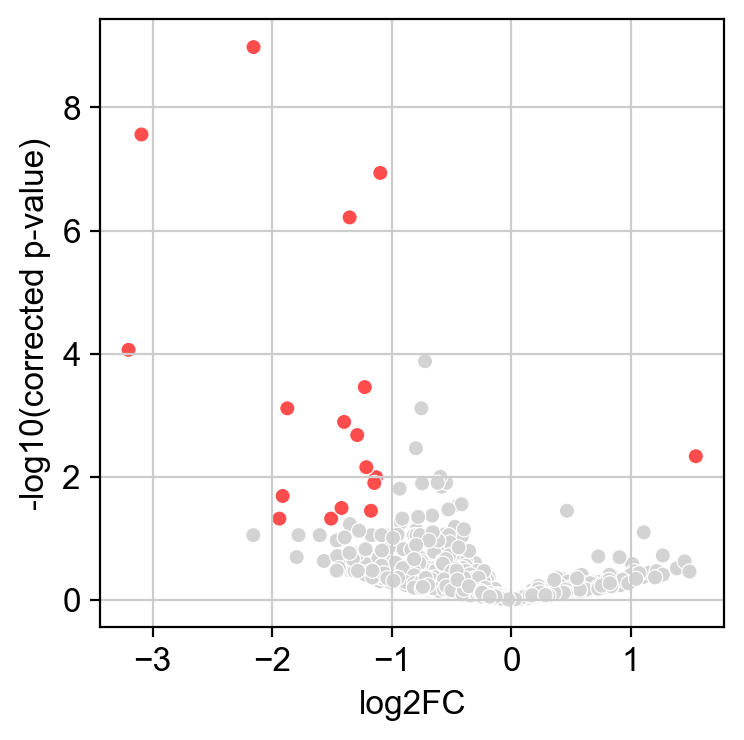

In [82]:
difxpy_reactivemicro_3dpi_INHvsCTRL_MG6.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [83]:
difxpy_reactivemicro_3dpi_INHvsCTRL_MG6.summary().to_csv(table_dir+today + 'difxpy_reactivemicro_3dpi_INHvsCTRL_MG6.csv')

In [84]:
difxpy_3dpi_INHvsCTRL_MG6 = pd.read_csv(table_dir + '230831difxpy_reactivemicro_3dpi_INHvsCTRL_MG6.csv', index_col=0)

In [85]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_3dpi_INHvsCTRL_expressed_MG6=difxpy_3dpi_INHvsCTRL_MG6.loc[difxpy_3dpi_INHvsCTRL_MG6['mean']>0.2]

In [86]:
difxpy_3dpi_INHvsCTRL_expressed_MG6

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,Mrpl15,0.927130,0.987485,-0.025318,0.379518,False,2.530003e-09,-0.025318,0.276828,-134.223941
1,Lypla1,0.711123,0.917986,-0.120628,0.265060,False,1.159297e-09,-0.120628,0.325715,-107.549169
2,Tcea1,0.952803,0.989341,0.019134,0.259036,False,1.461305e-09,0.019134,0.323278,-105.882421
4,Snhg6,0.015045,0.335433,-0.754352,0.451807,False,1.671051e-10,-0.754352,0.310268,-145.244744
5,Cops5,0.136777,0.639164,-0.387257,0.500000,False,1.654720e-09,-0.387257,0.260270,-157.301038
...,...,...,...,...,...,...,...,...,...,...
3695,mt-Nd4l,0.849054,0.964362,-0.076176,0.271084,False,7.525398e-09,-0.076176,0.400241,-106.952668
3696,mt-Nd4,0.326425,0.768023,-0.244776,6.704819,False,1.035532e-08,-0.244776,0.249431,-463.776929
3697,mt-Nd5,0.932014,0.987485,-0.025318,0.632530,False,1.623950e-08,-0.025318,0.296772,-177.964504
3698,mt-Cytb,0.570724,0.883048,-0.132336,11.319277,False,7.952026e-08,-0.132336,0.233404,-550.464381


In [87]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_3dpi_INHvsCTRL_expressed_signif_MG6 = difxpy_3dpi_INHvsCTRL_expressed_MG6.loc[difxpy_3dpi_INHvsCTRL_expressed_MG6['pval']<0.05]

In [88]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
micro_3dpi_INH_MG6 = difxpy_3dpi_INHvsCTRL_expressed_signif_MG6.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_MG6['log2fc']>0.7]
micro_3dpi_CTRL_MG6 = difxpy_3dpi_INHvsCTRL_expressed_signif_MG6.loc[difxpy_3dpi_INHvsCTRL_expressed_signif_MG6['log2fc']<-0.7]

In [89]:
micro_3dpi_INH_MG6.shape

(11, 10)

In [90]:
micro_3dpi_CTRL_MG6.shape

(91, 10)

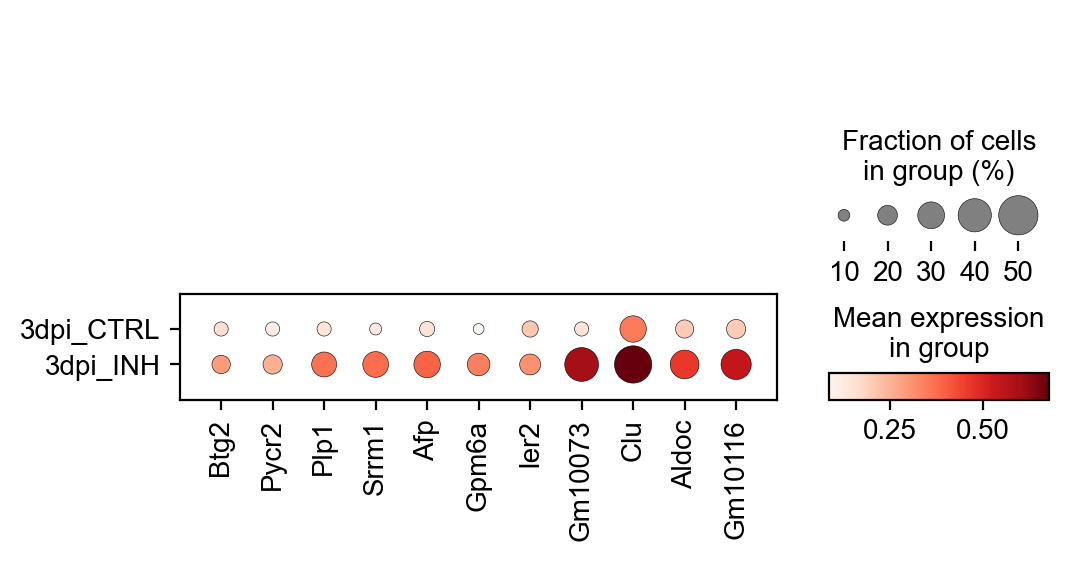

In [91]:
sc.pl.dotplot(adata_all_micro_3dpi_MG6,micro_3dpi_INH_MG6['gene'].head(30) , groupby='condition',)

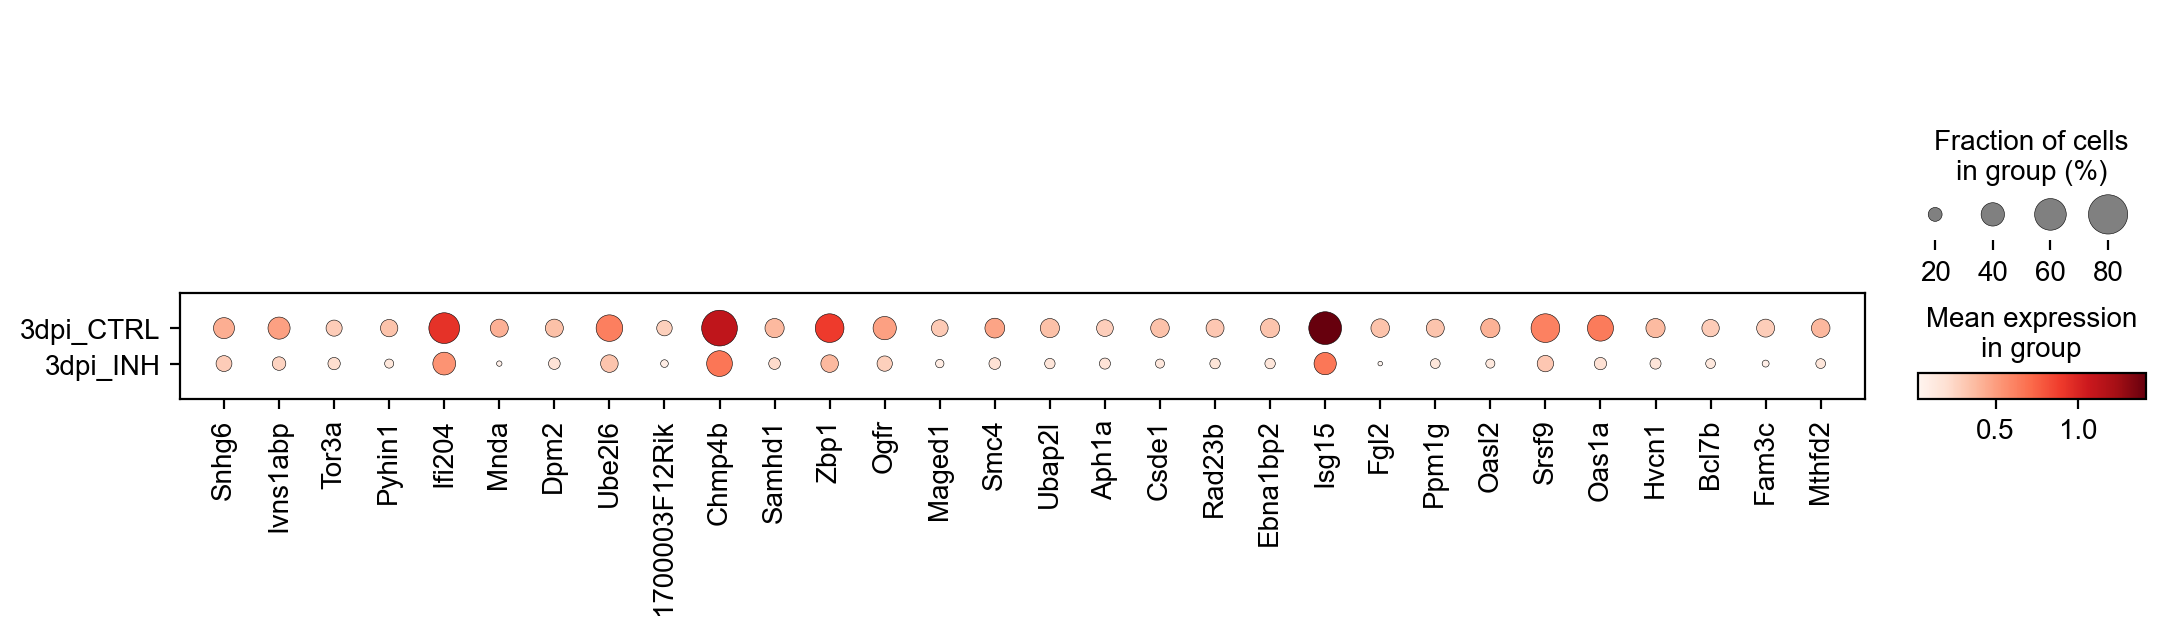

In [92]:
sc.pl.dotplot(adata_all_micro_3dpi_MG6,micro_3dpi_CTRL_MG6['gene'].head(30) , groupby='condition',)